<a href="https://colab.research.google.com/github/lasyaEd/DeepLearning/blob/main/authorshipClassificationModel_dataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Step 1: Load Data & Check for Issues

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

# Load dataset (update filename if needed)
df = pd.read_csv("/content/cleaned_authorship_dataset.csv")

# Display basic info
print("Dataset Overview:")
print(df.info())

# Show first few rows
df.head()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52143 entries, 0 to 52142
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            52134 non-null  float64
 1   cleaned_text  52134 non-null  object 
dtypes: float64(1), object(1)
memory usage: 814.9+ KB
None


,id,cleaned_text
0,10.0,Tim/Bob:\nAttached is the letter that we sent ...
1,10.0,"May-June, 2000\n---------------------- AM ----..."
2,10.0,"mona.petrochko@enron.com, susan.mara@enron.com..."
3,10.0,"james.steffes@enron.com, richard.shapiro@enron..."
4,10.0,"sarah.novosel@enron.com, susan.mara@enron.com,..."


##Step 2: Check for Missing Values

In [42]:

# Check missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Drop rows where cleaned_text is missing
df = df.dropna(subset=["cleaned_text"])

# Check again after dropping missing cleaned_text
print("Missing values after removing empty text rows:\n", df.isnull().sum())

# Fill missing IDs with a placeholder (if necessary)
#df["id"] = df["id"].fillna(-1)  # Use -1 to indicate unknown author

# Save cleaned dataset
df.to_csv("cleaned_authorship_dataset.csv", index=False)

print("Final dataset shape:", df.shape)
df.head()


Missing values before cleaning:
 id              9
cleaned_text    9
dtype: int64
Missing values after removing empty text rows:
 id              0
cleaned_text    0
dtype: int64
Final dataset shape: (52134, 2)


,id,cleaned_text
0,10.0,Tim/Bob:\nAttached is the letter that we sent ...
1,10.0,"May-June, 2000\n---------------------- AM ----..."
2,10.0,"mona.petrochko@enron.com, susan.mara@enron.com..."
3,10.0,"james.steffes@enron.com, richard.shapiro@enron..."
4,10.0,"sarah.novosel@enron.com, susan.mara@enron.com,..."


##Step 3: Count Number of Authors & Samples per Author

Total Unique Authors: 7

Top 10 Authors by Sample Count:
 id
11.0        16716
12.0        14206
10.0        11356
449628.0     4217
734562.0     2293
589736.0     2288
123456.0     1058
Name: count, dtype: int64


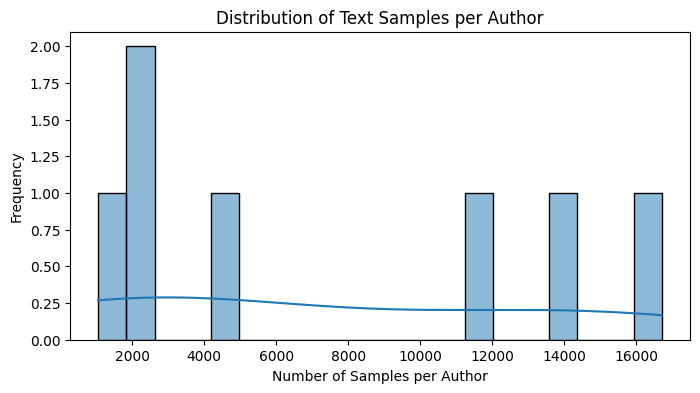

In [43]:
# Number of unique authors
print(f"Total Unique Authors: {df['id'].nunique()}")

# Distribution of samples per author
author_counts = df['id'].value_counts()

# Show top 10 authors with most data
print("\nTop 10 Authors by Sample Count:\n", author_counts.head(10))

# Visualize author distribution
plt.figure(figsize=(8,4))
sns.histplot(author_counts, bins=20, kde=True)
plt.xlabel("Number of Samples per Author")
plt.ylabel("Frequency")
plt.title("Distribution of Text Samples per Author")
plt.show()

###Top Authors by Sample Count:



1.   Author 11.0 has the most samples (16,716), followed by 12.0 (14,206), and 10.0 (11,356).
2.   Other authors have significantly fewer samples (e.g., 123456.0 has only 1,058). This imbalance could affect training




In [45]:
# Convert all 'id' values to string type
df["id"] = df["id"].astype(str)

# Verify the change
print(df.dtypes)  # id should now be 'object' (string)
df.head(5)

id              object
cleaned_text    object
dtype: object


,id,cleaned_text
0,10.0,Tim/Bob:\nAttached is the letter that we sent ...
1,10.0,"May-June, 2000\n---------------------- AM ----..."
2,10.0,"mona.petrochko@enron.com, susan.mara@enron.com..."
3,10.0,"james.steffes@enron.com, richard.shapiro@enron..."
4,10.0,"sarah.novosel@enron.com, susan.mara@enron.com,..."


###Balancing the Dataset

Our dataset is imbalanced, with author 123456 (your Model 1 training author) having the least samples (1,058). To balance it, we are:

*   Downsample overrepresented authors (reduce their sample size).





In [46]:
from sklearn.utils import resample

# Find the minimum sample count (to match)
min_samples = df["id"].value_counts().min()

# Downsample all authors to match `min_samples`
balanced_df = df.groupby("id", group_keys=False).apply(lambda x: x.sample(min_samples, random_state=42))

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the balanced dataset
balanced_df.to_csv("balanced_dataset.csv", index=False)

print("Balanced dataset shape:", balanced_df.shape)


<ipython-input-46-0d68fb5c0b1a>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby("id", group_keys=False).apply(lambda x: x.sample(min_samples, random_state=42))


Balanced dataset shape: (7406, 2)



✅ Updated Sample Counts Per Author:
 id
11.0        1058
734562.0    1058
589736.0    1058
10.0        1058
449628.0    1058
12.0        1058
123456.0    1058
Name: count, dtype: int64


<ipython-input-47-156e7c6eb152>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.index, y=author_counts.values, palette="Blues_r")


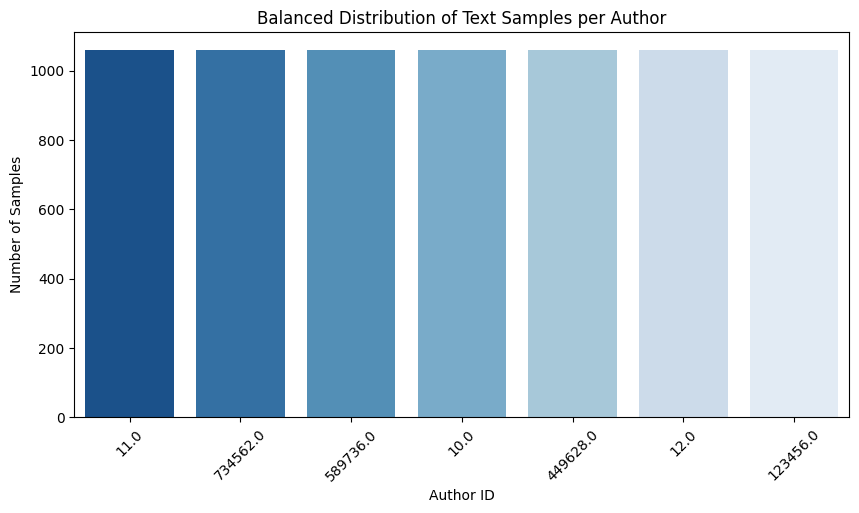

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of samples per author
author_counts = balanced_df["id"].value_counts()

# Print the updated author sample counts
print("\n✅ Updated Sample Counts Per Author:\n", author_counts)

# Plot the distribution
plt.figure(figsize=(10,5))
sns.barplot(x=author_counts.index, y=author_counts.values, palette="Blues_r")

plt.xlabel("Author ID")
plt.ylabel("Number of Samples")
plt.title("Balanced Distribution of Text Samples per Author")
plt.xticks(rotation=45)
plt.show()


##Step 4: Analyze Text Length

Average Word Count: 210.10
Average Character Count: 1376.42


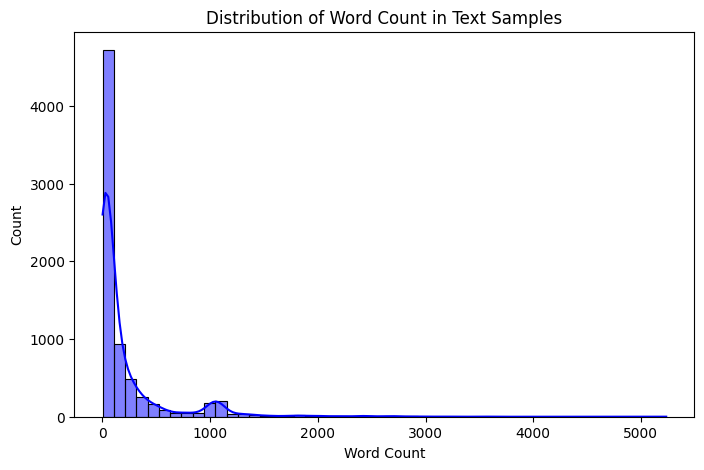

In [48]:
# Add text length features
balanced_df["word_count"] = balanced_df["cleaned_text"].apply(lambda x: len(str(x).split()))
balanced_df["char_count"] = balanced_df["cleaned_text"].apply(lambda x: len(str(x)))

# Display basic text statistics
print(f"Average Word Count: {balanced_df['word_count'].mean():.2f}")
print(f"Average Character Count: {balanced_df['char_count'].mean():.2f}")

# Plot word count distribution
plt.figure(figsize=(8,5))
sns.histplot(balanced_df["word_count"], bins=50, kde=True, color="blue")
plt.xlabel("Word Count")
plt.title("Distribution of Word Count in Text Samples")
plt.show()

## **📊 Text Length Analysis & Handling**
1. **🔡 Average Character Count:** ~1376 characters, aligning with word count distribution.  
2. **📏 Handling Long Texts:** Most samples are under 500 words, but some exceed 3000+.  
   - If needed, we will truncate or split long samples to maintain consistency.  
3. **📊 Right-Skewed Distribution:**  
   - Longer texts may introduce bias, so we may normalize lengths or use sliding windows.  
4. **🛠️ Action Plan:**  
   - If Model 2 struggles with text length, we will apply truncation or chunking.  
   - If it performs well across all lengths, we will not take any action.  


##Step 5: Generate WordCloud

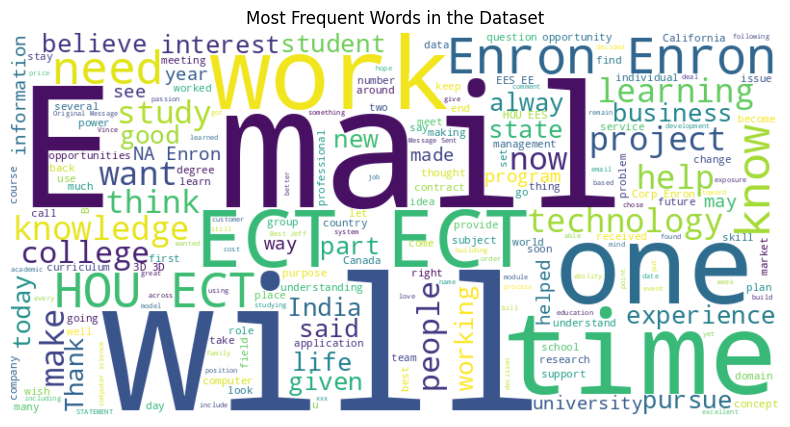

In [49]:
# Generate WordCloud for all text
text_data = " ".join(balanced_df["cleaned_text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

# Display WordCloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in the Dataset")
plt.show()

# **Approach for Model 2**

We need to prepare a dataset for **evaluating how well Model 1 mimics Author `123456`**.  
*(Note: We are not yet at a stage where Model 1 generates text.)*

## **📌 Dataset Labels**
1️⃣ **Real text from Author `123456`** → Labeled as **`1`**  
2️⃣ **Generated text from Model 1 (mimicking Author `123456`)** → Labeled as **`0`**  


####Train-Test Split
```
from sklearn.model_selection import train_test_split

# Split into training and testing
train_df, test_df = train_test_split(evaluation_df, test_size=0.2, random_state=42, stratify=evaluation_df["label"])

# Save splits
train_df.to_csv("train_evaluation.csv", index=False)
test_df.to_csv("test_evaluation.csv", index=False)

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

```
## **🛠️ Model 2 Training Strategy**

Since **Model 2 is a binary classifier**, we will choose from the following options:

1️⃣ **BERT/RoBERTa for text classification**  
2️⃣ **Logistic Regression with TF-IDF embeddings**  
3️⃣ **LSTM-based classifier**  

*(We will decide on the final model architecture based on performance and feasibility.)*  

---

## **🎯 Objective: What We Aim to Achieve with Model 2**
### **How Model 2 Will Work Once It's Ready**
Once trained, **Model 2 will evaluate whether Model 1's generated text sounds like the real author `123456`**.  

### **📌 Model 2 Workflow**
1️⃣ **Take a text sample (either real or generated).**  
2️⃣ **Predict if it was written by Author `123456` or not.**  

**Model Output:**  
✅ **`1` → Real** (Matches the author's style)  
❌ **`0` → Fake** (Does not match the author's style)  

3️⃣ **Evaluation Criteria:**  
   - If Model 1’s generated text is **classified as `1`**, it means Model 1 is doing well.  
   - If Model 2 frequently predicts **`0`**, it suggests **Model 1 needs improvement** in generating text that resembles the author's style.  

---
Once model2 is trained, we can run inference like this:

```
# Load the trained Model 2
from model2 import load_model  # Example: Depends on chosen approach

model = load_model("model2_trained.pth")  # Replace with actual model

# Example text generated by Model 1
generated_text = "This is a sample text generated by Model 1."

# Model 2 evaluates it
prediction = model.predict(generated_text)

# Interpret result
if prediction == 1:
    print("✅ Model 1's text matches Author 123456's style!")
else:
    print("❌ Model 1's text does NOT match Author 123456's style.")
```

### **🚀 Next Steps**
- **Decide on the model architecture for Model 2.**  
- **Train Model 2 on labeled real and generated text data.**  
- **Evaluate its performance and fine-tune as needed.**  




